## BST 267: Introduction to Social and Biological Networks (2022)

## Final Project

### Overview

In this final project we will use network data from a survey of social networks in 75 villages in rural southern Karnataka, India. This dataset was originally collected to study diffusion of microfinance. The details of the original publication are: Abhijit Banerjee, Arun G. Chandrasekhar, Esther Duflo, Matthew O. Jackson. The Diffusion of Microfinance. Science, Vol. 341 no. 6144, 2013.

We will use the network data to investigate the spread of a fictious pathogen. We will assume that these social networks correspond to contact networks for the given pathogen. In other words, if any two individuals are connected in the network, then the pathogen may spread between them.

### Question 1: Downloading and reading in village data

Your first task is to download the dataset from Harvard Dataverse. We'll work with the latest version of the dataset which is available here:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/U3BIHX&version=9.4

Proceed to download the data to your computer. You will be asked a couple of questions. One of them is: "What is the intended use of the files that you are requesting to download?" You should select the following option: "Student: completing an exercise or problem set designed for this dataset".

The downloaded file is a compressed zip file, so you need to unzip it first and place it in **the same directory where this notebook is located** on your computer. The folder of interest to us is called `Data`. Its subfolder `1. Network Data` contains adjacency matrices as CSV files for each village. The adjacency matrices themselves are in the folder `Adjacency Matrices`. The main folder comes with a file called `README.pdf` which you should consult as needed to get a better understanding of the data.

The code for reading in network adjacency matrices and for constructing the network objects is below. In this question, you need to do to two things: 1) add one comment line preceding each line of code (apart from the import statements) to clarify what each line does; and 2) run the code.

Note: Different operating systems have slightly different ways of specifying file paths. The code below runs as is if you're on Mac; if you're a Windows of Linux user, you may need to modify the line specifying the path.

In [1]:
# RUN THIS CODE AND ADD COMMENTS

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# set the path to the data of adjacency matrices
path = "./datav4.0/Data/1. Network Data/Adjacency Matrices/"
# village numbers saved in a list named "villages"
villages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21,  \
            23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, \
            41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, \
            59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
# create a void dictionary of graphs
Gs = {}
# write a for loop to iteratly read the adjacency matrices by its index "k" and create a graph for each village
for k in villages:
    # assign the filename to a variable named "filename" by using the path and the village index "k"
    filename = path + "adj_allVillageRelationships_vilno_" + str(k) + ".csv"
    # read the csv file and save it in a variable named "A" (separate values of adjacency matrix by commas).
    A = np.loadtxt(filename, delimiter=",")
    # create a graph from the adjacency matrix and save it in a variable named "G" (Use the networkx library)
    G = nx.to_networkx_graph(A)
    # add the graph of this village to the dictionary "Gs" of graphs, with the key of village index "k" and the value G
    Gs[k] = G

### Question 2: Extracting largest connected components

Most empirical networks contain a largest connected component (LCC) that contains most network nodes. Create dictionary `LCCs` that consists of the largest connected components (graph objects) of the networks in the `Gs` dictionary. (You may find `nx.induced_subgraph` to be useful in this problem.) Make sure that the keys match across the two dictionaries. Create a dot plot where the y-axis shows the proportion of nodes in the LCC of each graph and the x-axis corresponds to the index of the village. (The village index runs from 1 to 77 but we're skipping over a couple of villages.) The ordering of the villages on the x-axis should be such that the y-axis values increase from left to right.

<IPython.core.display.Javascript object>


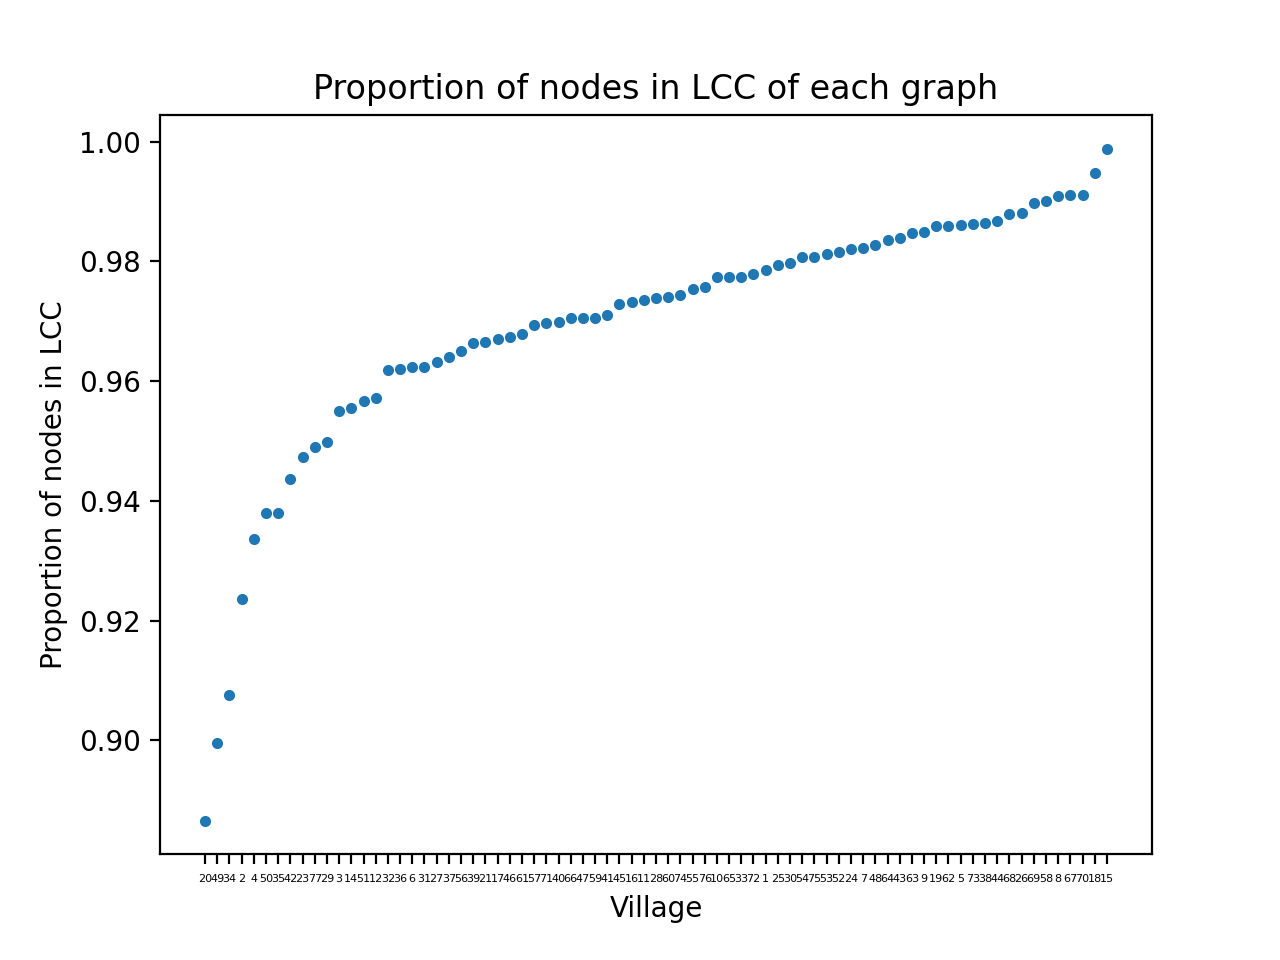

In [2]:
# ADD YOUR CODE HERE
# Create dictionary `LCCs` that consists of the largest connected components (graph objects) of the networks in the `Gs` dictionary
LCCs = {}
# use `nx.induced_subgraph` Make sure that the keys match across the two dictionaries
for k in Gs:
    LCCs[k] = nx.induced_subgraph(Gs[k], max(nx.connected_components(Gs[k]), key=len))

# Create a dot plot where the y-axis shows the proportion of nodes in the LCC of each graph 
prop_nodes = {}

for k in LCCs:
    prop_nodes[k] = len(LCCs[k].nodes())/len(Gs[k].nodes())

# The x-axis corresponds to the index of the village. 
# connect x with prop_nodes
x, prop_nodes = zip(*sorted(prop_nodes.items(), key=lambda x: x[1]))
# convert x to a string
x = [str(i) for i in x]
# plot the graph
plt.figure()
plt.plot(x, prop_nodes, '.')
plt.xticks(fontsize=4)
plt.xlabel('Village')
plt.ylabel('Proportion of nodes in LCC')
plt.title('Proportion of nodes in LCC of each graph')
plt.show()


### Question 3: Visualizing networks and their degree and distributions

Visualize the LCC (graph) of each network in a single figure using a layout consisting of 13x6 panels. Using `plt.figure(figsize=(20,40))` should look reasonable.

In a separate figure, in a single panel, plot the degree distribution of each LCC. To make the plot more readable, you should use a line plot and not a histogram.

<IPython.core.display.Javascript object>


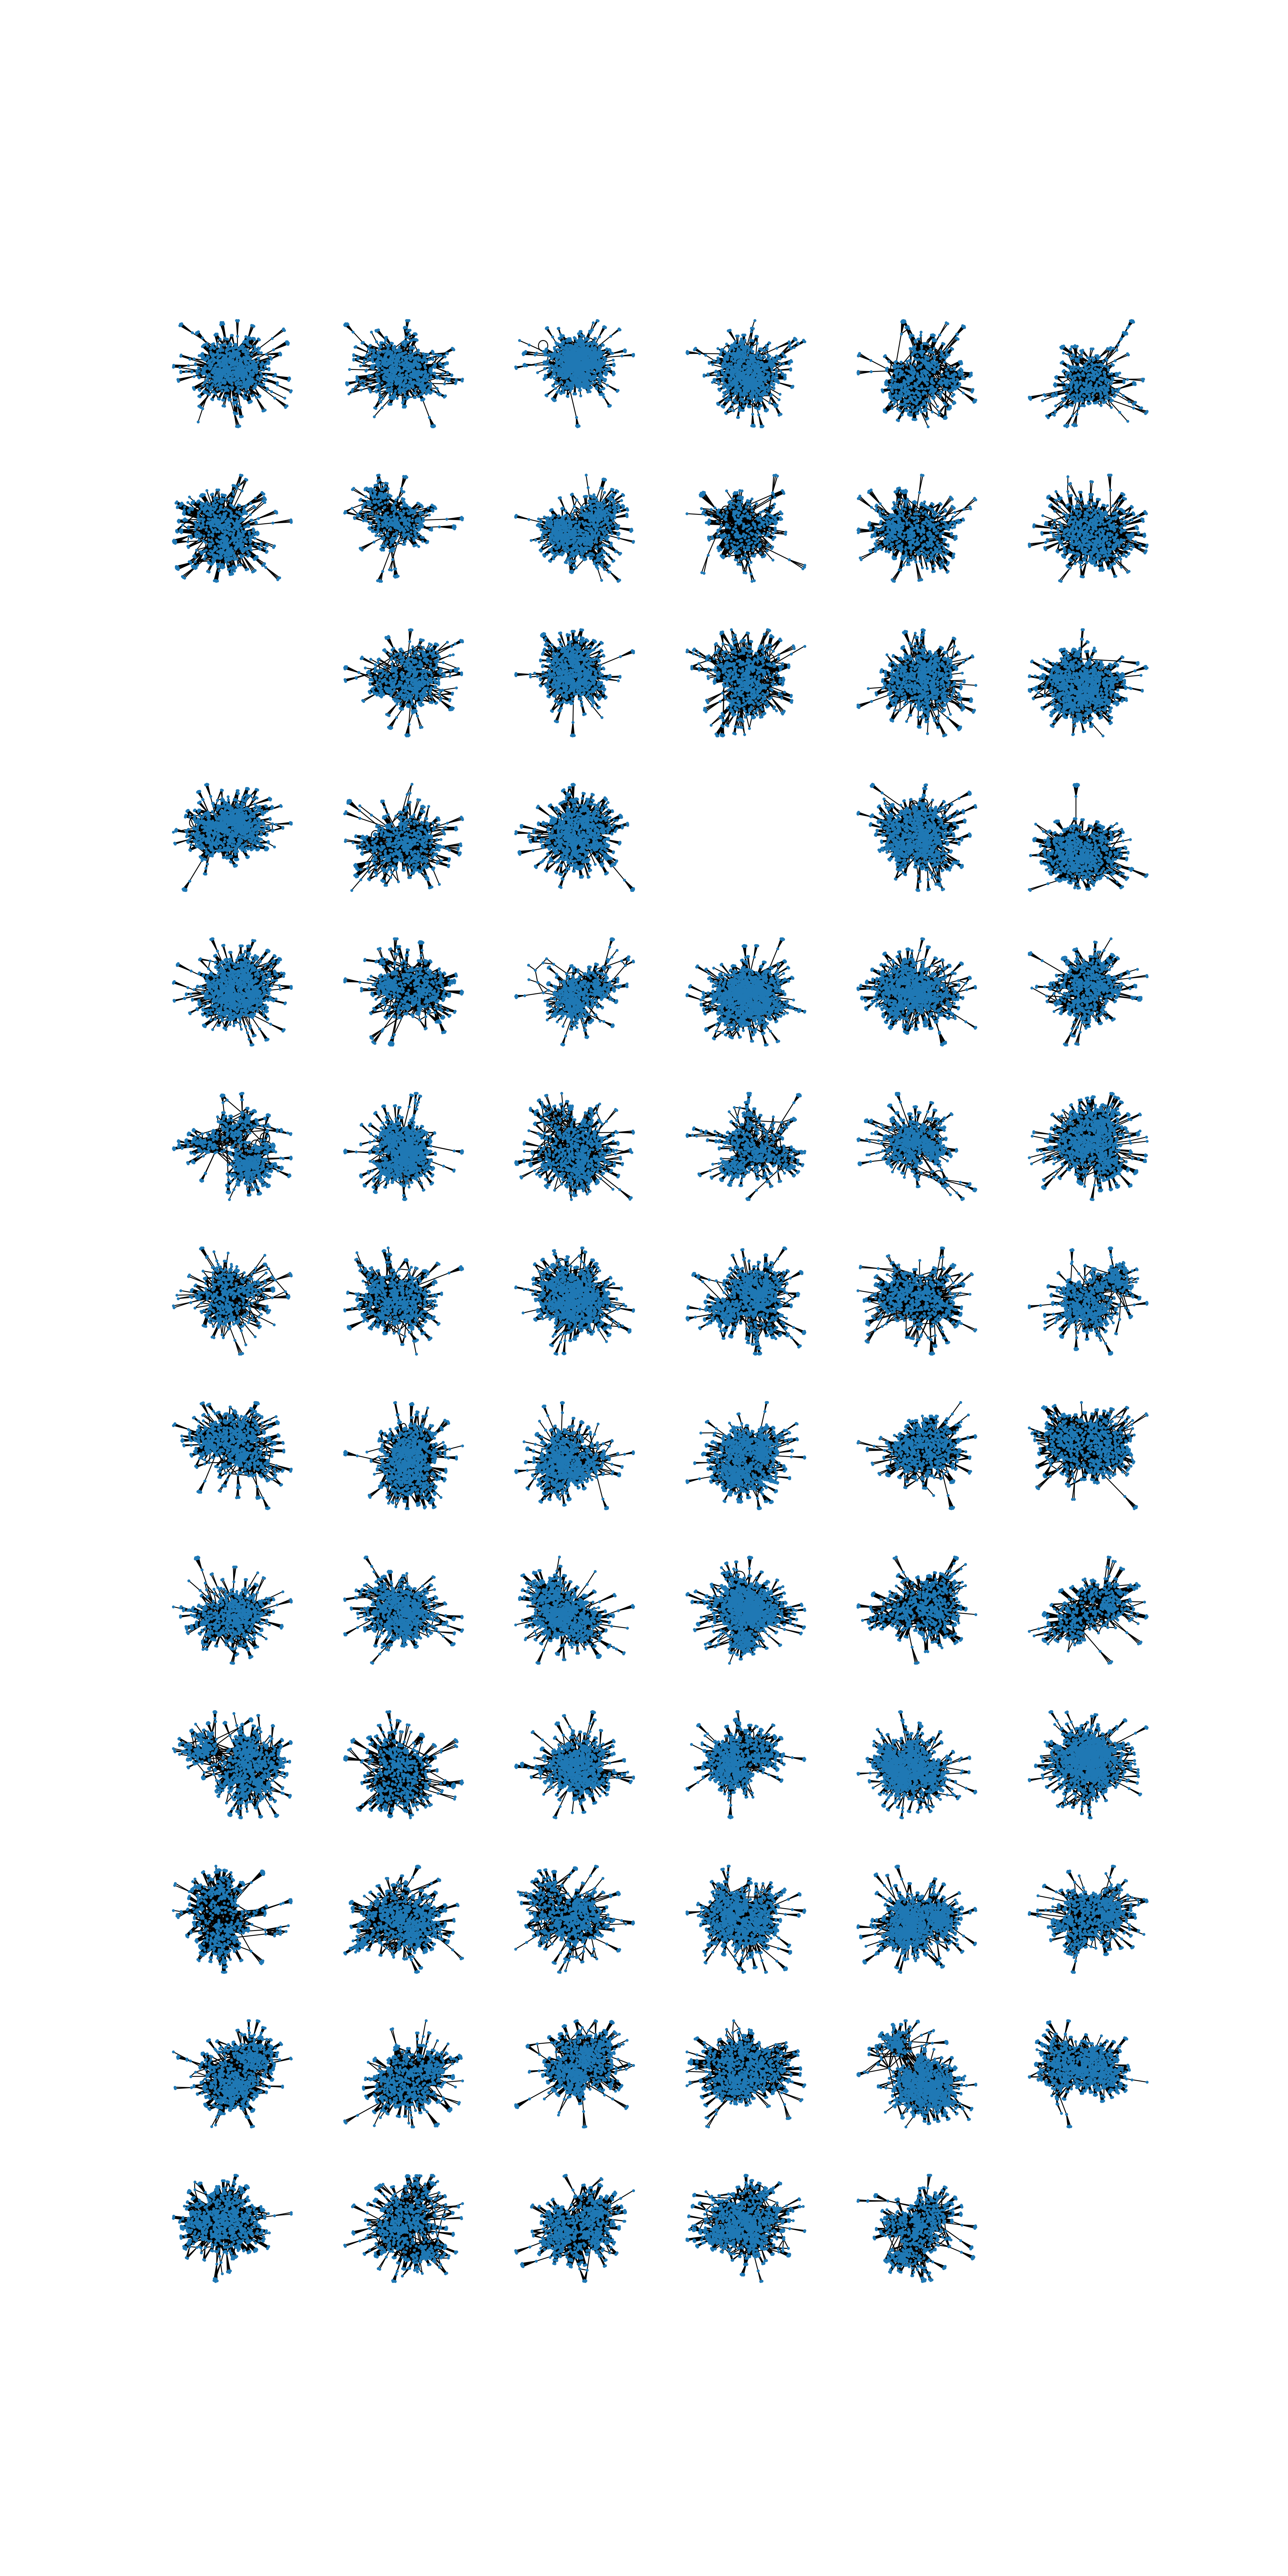

In [3]:
# ADD YOUR CODE HERE
plt.figure(figsize=(20,40))
for k in LCCs:
    #print(k)
    plt.subplot(13, 6, k)
    nx.draw(LCCs[k], with_labels=False, node_size=5)

<IPython.core.display.Javascript object>


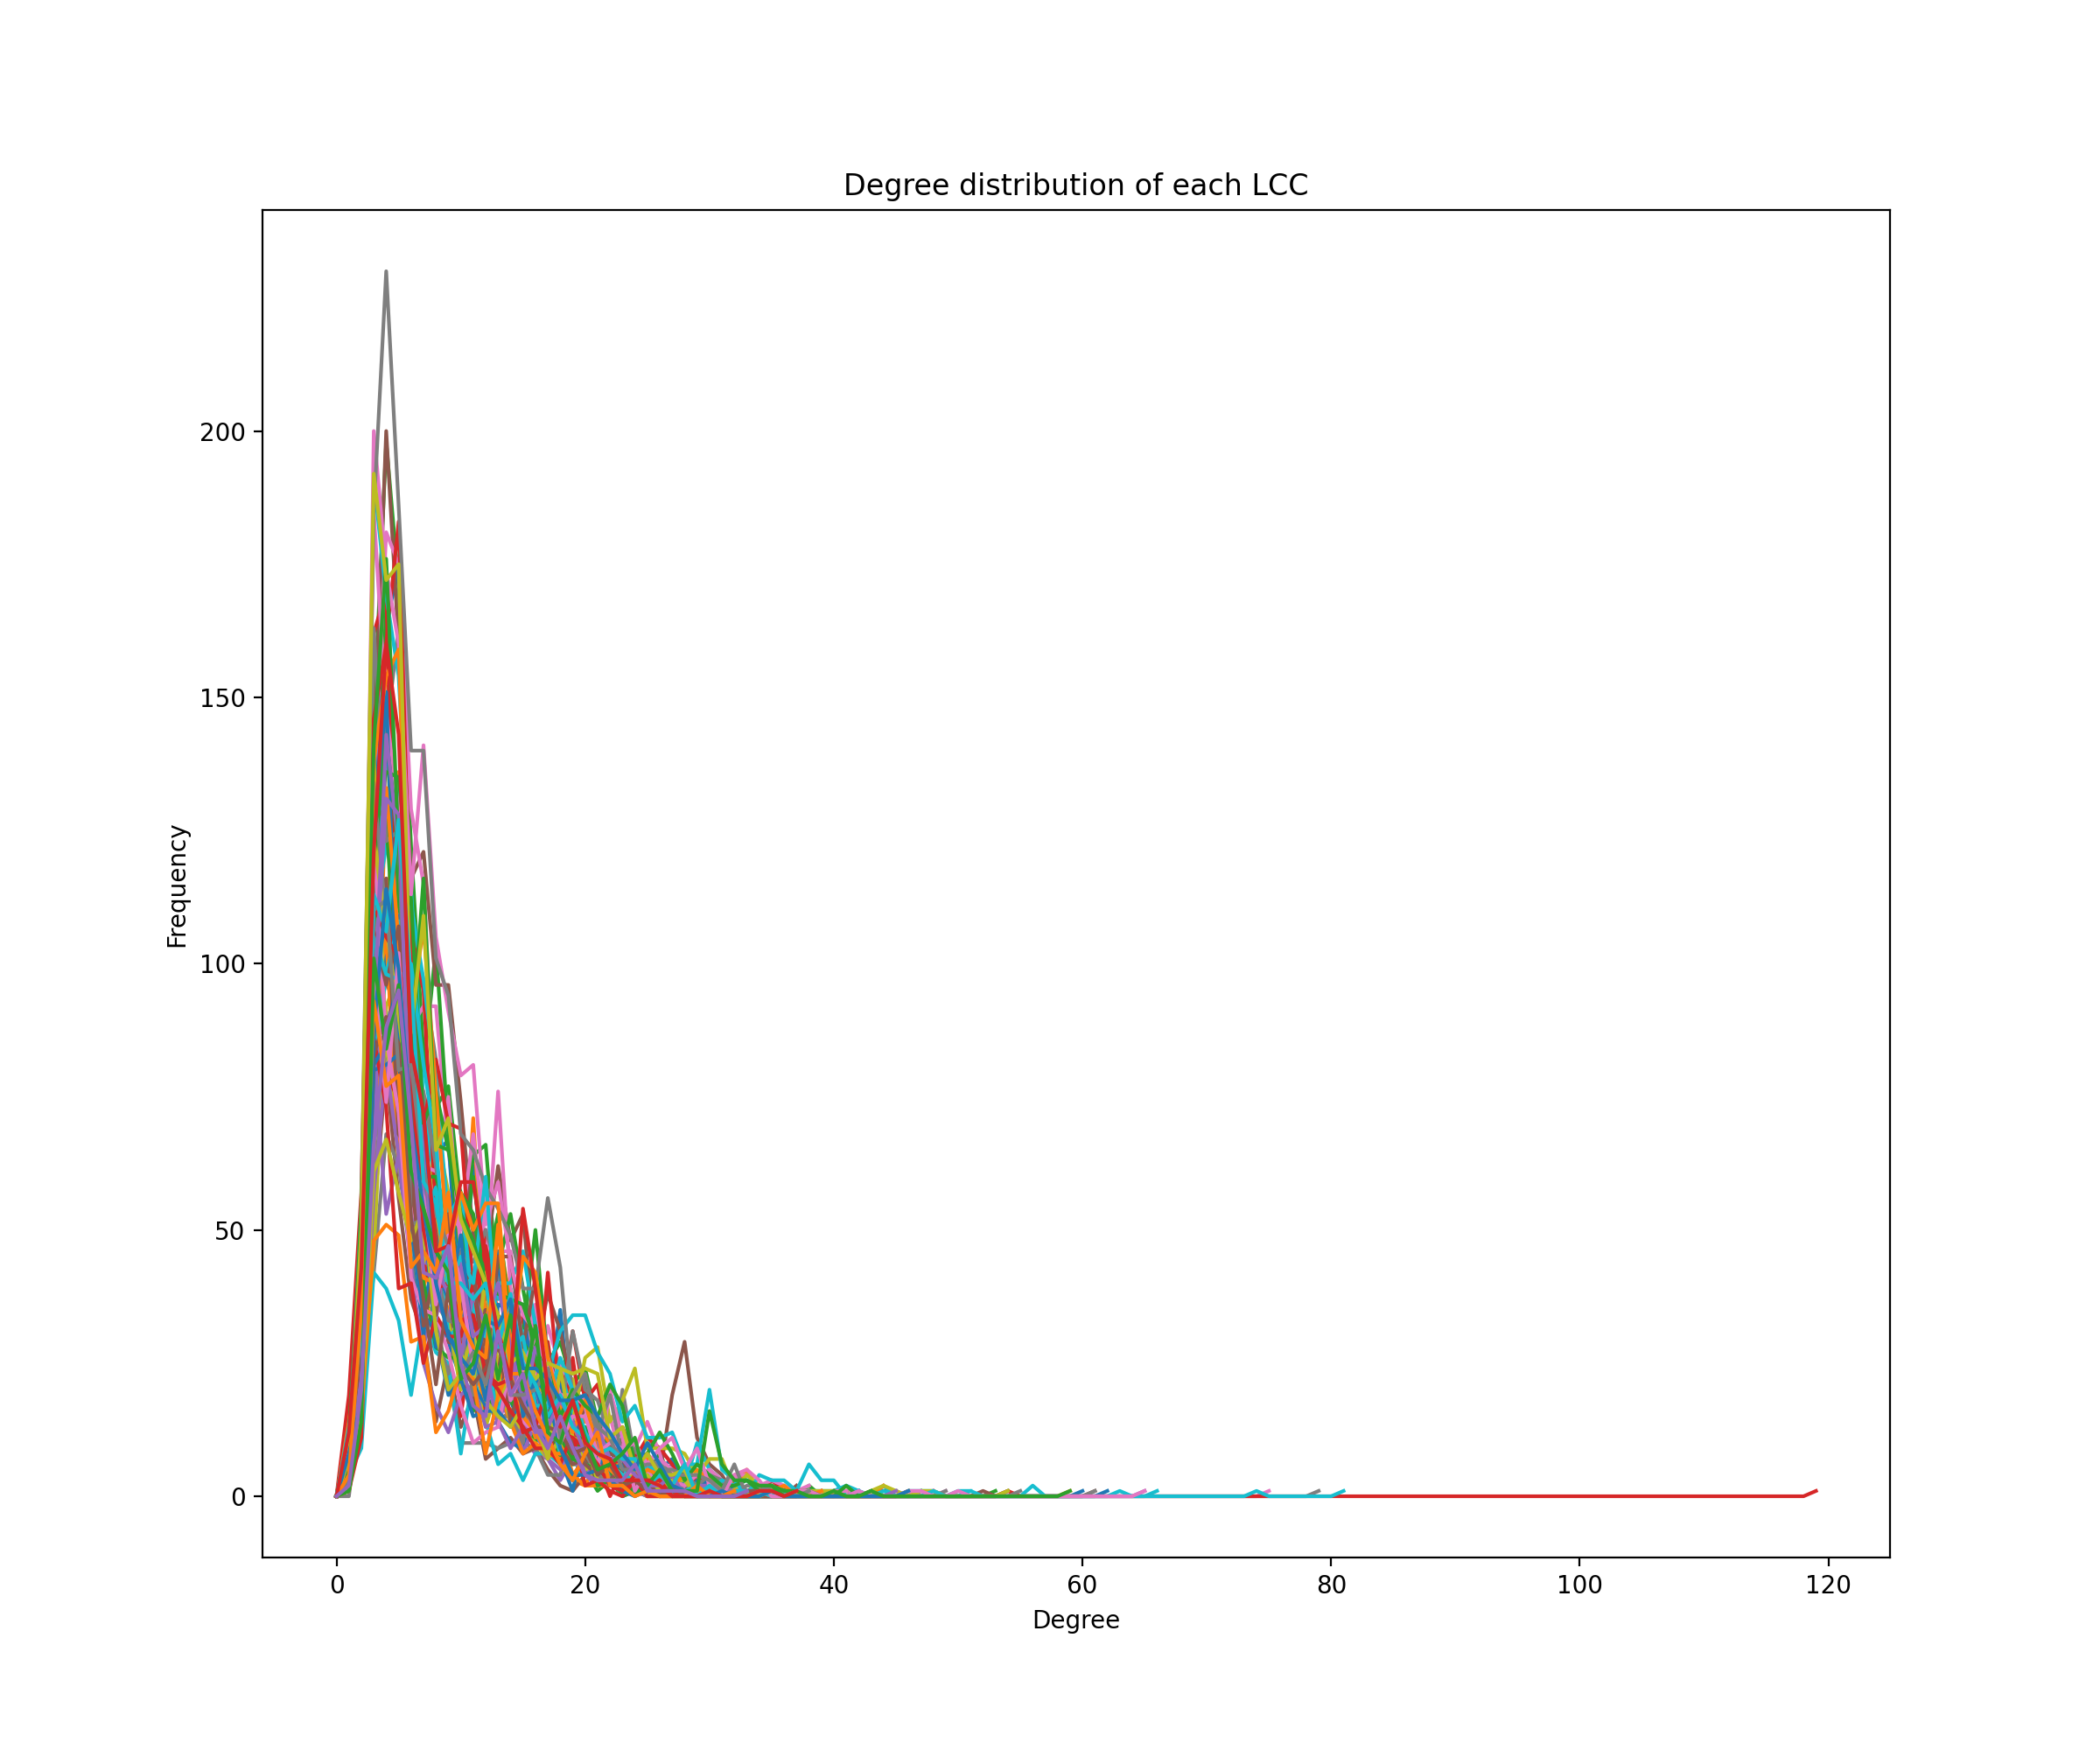

In [4]:
# In a separate figure, in a single panel, plot the degree distribution of each LCC. 
# To make the plot more readable, you should use a line plot and not a histogram.
plt.figure(figsize=(12,10))
for k in LCCs:
    degrees = [val for (node, val) in LCCs[k].degree()]
    degree_dist = nx.degree_histogram(LCCs[k])
    plt.plot(degree_dist, label=k)
#plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree distribution of each LCC')
plt.show()

### Question 4: Simulating SIR process

Write code to simulate discrete-time SIR spreading process on the LCCs of four villages only: 1, 31, 61, and 77. Set the S to I transition probability `p_si` to 0.2 and the I to R transition probability `p_ir` to 0.1. Initially only one individual, selected uniformly at random among the LCC nodes, is infected; the rest of the LCC is susceptible. Use **unit infectivity** in the SIR simulation: each infected node, per time step, selects only one network neighbor uniformly at random among its neighbors and potentially transmits the pathogen to it. Any node, regardless of their degree, will therefore infect 0 or 1 nodes per time step.

Run the simulation 300 times for each of the four LCCs. In four separate panels, one per village, plot the proportion of individuals in each of the three states (S, I, R) against time for each simulation run. Explain your findings.

<IPython.core.display.Javascript object>


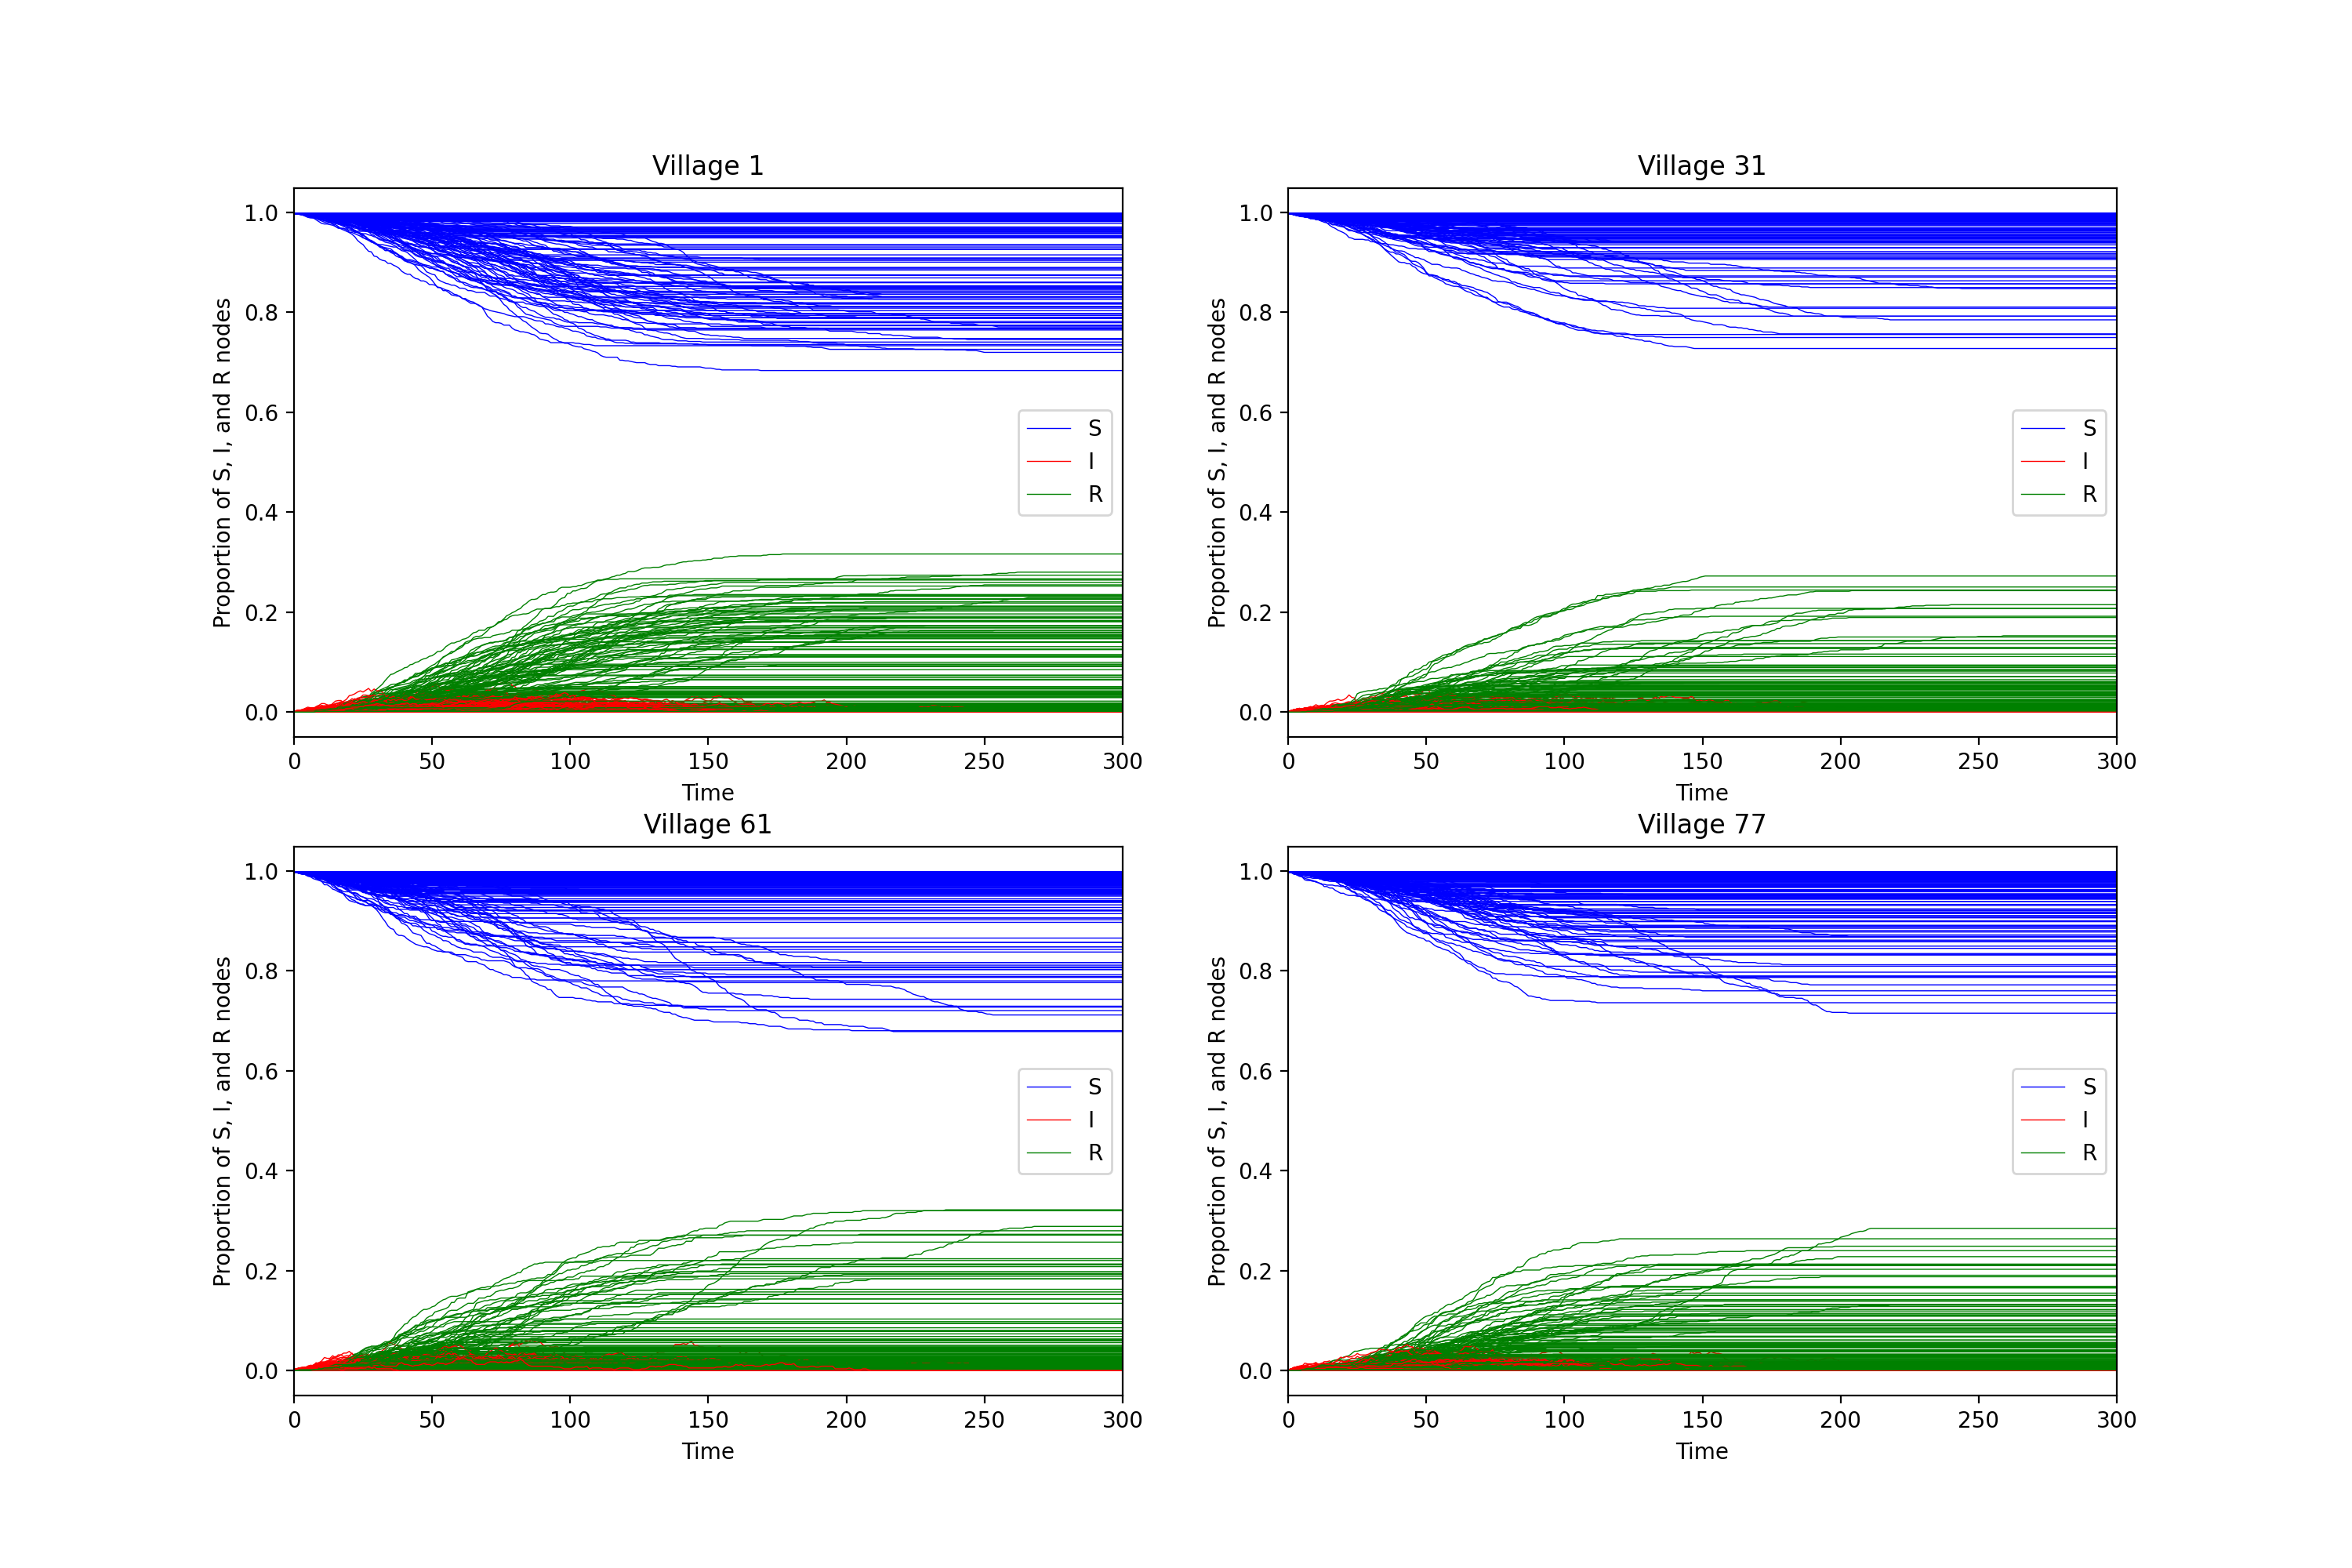

In [5]:
import random
p_si = 0.2 # S to I transition probability
p_ir = 0.1 # I to R transition probability

# ADD YOUR CODE HERE
select_village = [1, 31, 61, 77]

# define the recover process, i_nodes is a list contains all infected nodes. r_nodes is a list contains all recover nodes, p is the per-day probability for the I to R transition. 
def recover(i_nodes, r_nodes, p):
    new_r_nodes = []
    for i in i_nodes:
        if np.random.random() < p:
            new_r_nodes.append(i)
    for i in new_r_nodes:
        i_nodes.remove(i)
        r_nodes.append(i)
    return new_r_nodes

# define the spread process, i_nodes is a list contains all infected nodes. s_nodes is a list contains all susceptible nodes, p is the per-day probability for the S to I transition.
# selects only one network neighbor uniformly at random among its neighbors and potentially transmits the pathogen to it
def spread(G, i_nodes, s_nodes, p):
    new_i_nodes = set()
    for i in i_nodes:
        try:
            neighbor = random.choice(list(G.neighbors(i)))
            if neighbor in s_nodes and np.random.random() < p:
                new_i_nodes.add(neighbor)
        except:
            pass
    for i in new_i_nodes:
        s_nodes.remove(i)
        i_nodes.append(i)
    return new_i_nodes

# define the SIR process, G is the graph,  p_si is the per-day probability for the S to I transition, p_ir is the per-day probability for the I to R transition.
def SIR(G, p_si, p_ir, seeds, time_steps):
    i_nodes = random.sample(list(G.nodes()), seeds)
    s_nodes = list(set(G.nodes()) - set(i_nodes))
    r_nodes = []
    num_s = [len(s_nodes)]
    num_i = [len(i_nodes)]
    num_r = [len(r_nodes)]
    n = [len(list(G.nodes()))]

    for i in range(time_steps):
        new_r_nodes = recover(i_nodes, r_nodes, p_ir)
        new_i_nodes = spread(G, i_nodes, s_nodes, p_si)
        num_s.append(len(s_nodes))
        num_i.append(len(i_nodes))
        num_r.append(len(r_nodes))
    return n, num_s, num_i, num_r

# function to plot plot the proportion of individuals in each of the three states (S, I, R) against time for each simulation run
def plot_sir(num_nodes, num_s, num_i, num_r, time_steps):
    # proportion of individuals in each of the three states (S, I, R) 
    prop_s = np.array(num_s)/num_nodes
    prop_i = np.array(num_i)/num_nodes
    prop_r = np.array(num_r)/num_nodes

    p_s, = plt.plot(prop_s, label='S', color='blue', linewidth=0.5)
    p_i, = plt.plot(prop_i, label='I', color='red', linewidth=0.5)
    p_r, = plt.plot(prop_r, label='R', color='green', linewidth=0.5)
    plt.legend(handles=[p_s, p_i, p_r])
    plt.xlim(0, time_steps)
    plt.xlabel('Time')
    plt.ylabel('Proportion of S, I, and R nodes')
    plt.title('Proportion of individuals in each of the three states (S, I, R) against time')
    plt.show()

# plot select_village
seed = 1
plt.figure(figsize=(15,10))
plot_flag = 1
for k in select_village:
    ax = plt.subplot(2, 2, plot_flag)
    for sim_idx in range(300):
        G_sim = LCCs[k]
        n, num_s, num_i, num_r = SIR(G_sim, p_si, p_ir, seed, 300)
        plot_sir(n, num_s, num_i, num_r, 300)
    ax.set_title('Village ' + str(k))
    plot_flag += 1

    

Seeing from the plots above, we can see that there exists a difference between S nodes with I and R nodes. In other words, the S nodes owns much more fraction than I and R nodes among the 4 selected villages. And the plots from 4 different villages are similar.

The SIR simulation is being run on the largest connected component (LCC) of four villages. The probability of transitioning from the susceptible state (S) to the infected state (I) is set to 0.2, and the probability of transitioning from the infected state (I) to the recovered state (R) is set to 0.1. At the start of the simulation, only one individual is infected, and the rest are susceptible. In each time step, each infected individual has a probability of 0.2 of infecting one of their network neighbors, selected uniformly at random. The infected individuals will then remain in the I state until they recover with probability 0.1 in each time step. The proportion of individuals in each of the three states (S, I, R) against time for each simulation run showed the spread of the infection progresses over time in each village and how it varies between different runs of the simulation.

From the first few running steps, the S nodes dicreased and the I and R nodes increased. After around 150 running steps, the S and R nodes became stable and the I nodes fall to 0. 

### Question 5: Reproduction number

Reproduction number for any infectious disease can be succinctly summarized as **the number of persons infected per person infecting**. There are many variants of this concept. The first thing to note is that this number varies during the epidemic. The **basic reproduction number $R_0$** is usually defined as the expected number of cases generated by one case in a fully susceptible population. Because the population is fully susceptible only at the very beginning of an epidemic, $R_0$ may be less informative about what happens later, especially for a network (vs. mass-action) model. The **effective reproduction number $R_t$** is usually defined as the expected number of cases generated by one case at time $t$ in a partially susceptible population. If we set time $t=0$, then $R_t$ coincides with $R_0$.

Use simulation to compute (estimate) the effective reproduction number $R_t$ as a function of time for the SIR process for the LCC of village 1 and the LCC of village 31 using at least 1000 spreading process realizations for each. Make a plot with three panels: (1) plot $R_t$ for each realization over time and mean $R_t$ over time for village 1 (left panel); (2) same for village 31 (middle panel); and (3) plot the mean $R_t$ for the two villages (two curves) over time.

<IPython.core.display.Javascript object>


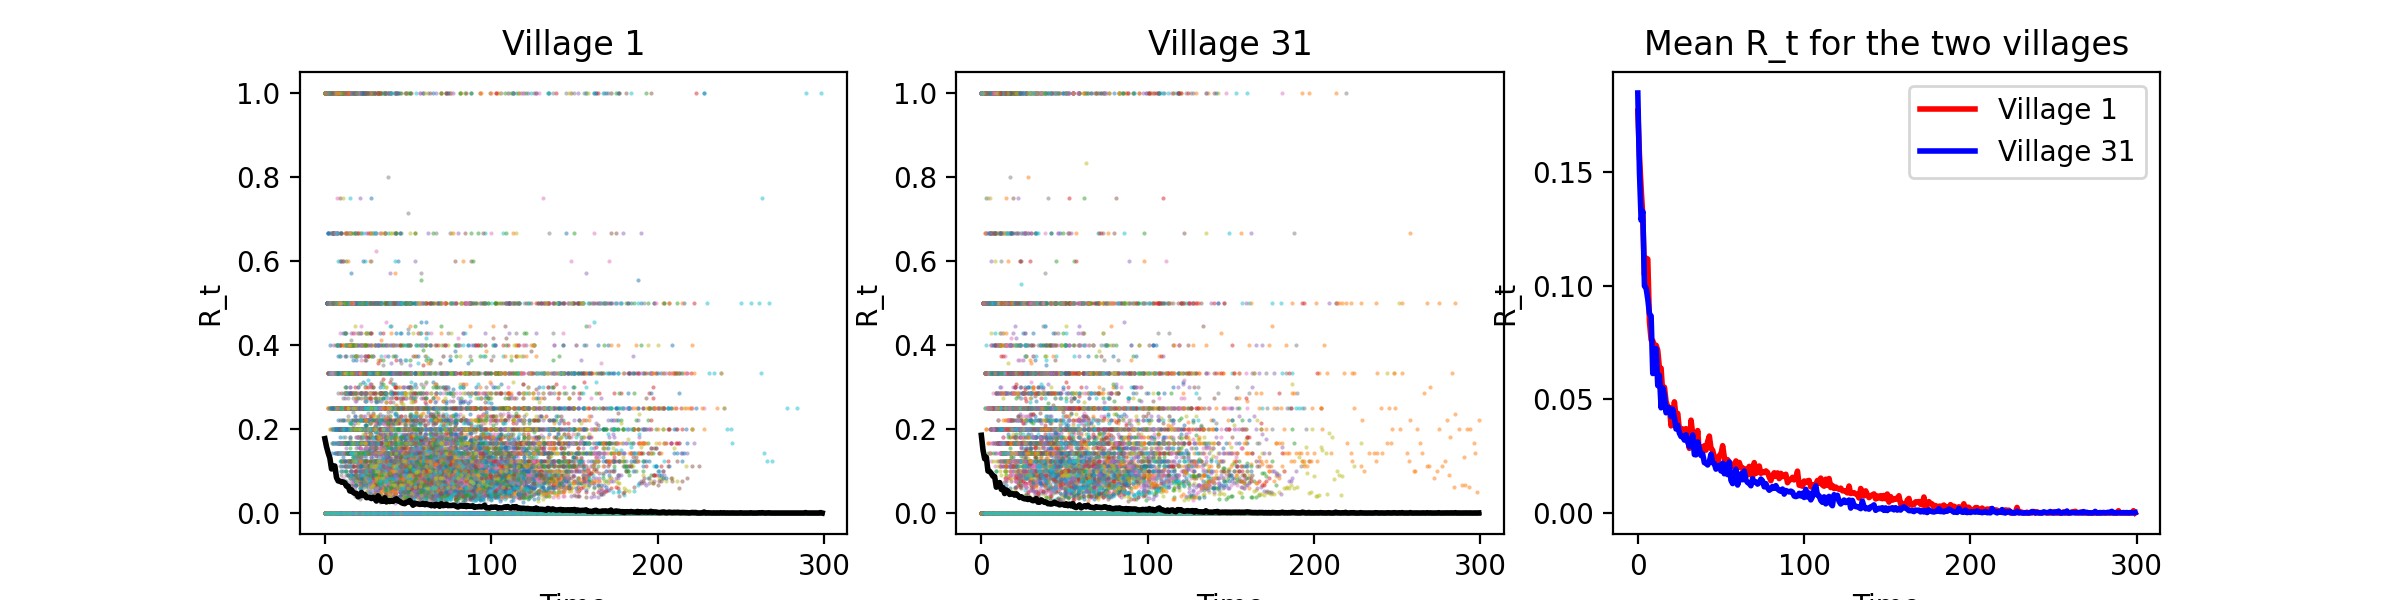

In [6]:
# ADD YOUR CODE HERE
# Use simulation to compute (estimate) the effective reproduction number $R_t$ as a 
# function of time for the SIR process for the LCC of village 1 and the LCC of village 31 
# using at least 1000 spreading process realizations for each.

spreading_process_time = 1000
seed = 1
villages_Q5 = [1, 31]
num_time_steps = 300

# Reproduction number: the number of persons infected per person infecting.
#  The effective reproduction number R_t usually defined as the expected number of cases generated by one case at time t in a partially susceptible population.
R_t = {}

# Make a plot with three panels
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# list to represent time steps
time_steps = np.arange(0, num_time_steps)

# matrix to store the R_t for each village
R_t_matrix = np.zeros((len(villages_Q5), spreading_process_time, num_time_steps))

for village_idx, village in enumerate(villages_Q5):
    for sim_idx in range(spreading_process_time):
        G_sim = LCCs[village]
        n, num_s, num_i, num_r = SIR(G_sim, p_si, p_ir, seed, num_time_steps)
        # compute R_t for each time step
        for t in range(num_time_steps):
            R_t_matrix[village_idx, sim_idx, t] = (num_s[t]-num_s[t+1])/num_i[t] if num_i[t] != 0 else 0
        # plot R_t for each realization over time
        if village == 1:
            ax1.plot(time_steps, R_t_matrix[village_idx, sim_idx, :], '.', alpha=0.5, markersize=1)
        else:
            ax2.plot(time_steps, R_t_matrix[village_idx, sim_idx, :], '.', alpha=0.5, markersize=1)
    # plot mean R_t over time
    if village == 1:
        ax1.plot(time_steps, np.mean(R_t_matrix[village_idx, :, :], axis=0), color='black', linewidth=2, label='Mean')
        ax1.set_title('Village 1')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('R_t')
    else:
        ax2.plot(time_steps, np.mean(R_t_matrix[village_idx, :, :], axis=0), color='black', linewidth=2, label='Mean')
        ax2.set_title('Village 31')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('R_t')

# plot mean R_t for the two villages (two curves) over time
ax3.plot(time_steps, np.mean(R_t_matrix[0, :, :], axis=0), color='red', linewidth=2, label='Village 1')
ax3.plot(time_steps, np.mean(R_t_matrix[1, :, :], axis=0), color='blue', linewidth=2, label='Village 31')
ax3.set_title('Mean R_t for the two villages')
ax3.set_xlabel('Time')
ax3.set_ylabel('R_t')
ax3.legend()

plt.show()

### Question 6: Individual-level randomized controlled vaccine trial

In this question, you will implement an individual-level randomized trial to assess the efficacy of a new vaccine against an infectious disease. In these trials, every individual in every village is randomized to treatment with probability 1/2 and to control with probability 1/2. On average, half of the individuals in each village will be assigned to treatment and the other half to control.

We will assume that the true S to I transmission probabilities for treated and untreated (control) individuals are known and they are `p_si_treatment` and `p_si_control`, respectively. We will assume that the I to R probability for recovery is known and is given by `p_ir`.

Write the code to simulate this clinical trial. You will need to randomize each individual in every village to treatment or control and then propagate the SIR process on each village network independently until it naturally comes to a halt. The output for each village should be the proportion of cases in the treatment group (i.e, proportion of nodes in the treatment group that were infected at some point), the proportion of cases in the control group, and the difference between the two. Your code should print out three numbers: (1) the average proportion of cases in the treatment groups (where average is taken across all villages); (2) the average proportion of cases in the control groups (where average is taken across all villages); and (3) proportion of cases in the control group - proportion of cases in the treatment group (i.e., difference in two proportions), averaged over all villages.

Note: To simplify implementation, in this question "village" refers to the LCC of the village.

In [7]:
# fix some parameters
p_ir = 0.05
p_si_treatment = 0.05
p_si_control = 0.3

# ADD YOUR CODE HERE
# implement individual-level randomized trial to assess the efficacy of a new vaccine against an infectious disease. 
# In these trials, every individual in every village is randomized to treatment with probability 1/2 and to control with probability 1/2. 

# We will assume that the true S to I transmission probabilities for treated and untreated (control) individuals are known and they are p_si_treatment and p_si_control, respectively. We will assume that the I to R probability for recovery is known and is given by p_ir.
# simulate this clinical trial. 

def spread6(G, p_si_treatment, p_si_control, s_nodes, i_nodes):
    new_i_nodes = set()
    for i in i_nodes:
        try:
            neighbor = random.choice(list(G.neighbors(i)))
            if neighbor in s_nodes:
                if neighbor in treatment and random.random() < p_si_treatment:
                        new_i_nodes.add(neighbor)
                elif neighbor in control and random.random() < p_si_control:
                        new_i_nodes.add(neighbor)
        except:
            pass
    for j in new_i_nodes:
        s_nodes.remove(j)
        i_nodes.append(j)
    return new_i_nodes

def SIR6(G, p_si_treatment, p_si_control, p_ir, seed):
    i_nodes = random.sample(list(G.nodes()), seed)
    s_nodes = list(set(G.nodes()) - set(i_nodes))
    r_nodes = []
    
    # propagate the SIR process on each village network independently 
    # until it naturally comes to a halt.
    while len(i_nodes) > 0:
        new_r_nodes = recover(i_nodes, r_nodes, p_ir)
        new_i_nodes = spread6(G, p_si_treatment, p_si_control, s_nodes, i_nodes)
        # randomize each individual in every village to treatment or control 
    treatment_num = 0
    for r in r_nodes:
        treatment_num += 1 if r in treatment else 0
    control_num = len(r_nodes) - treatment_num
    
    # The output for each village should be the proportion of cases in the treatment group 
    # (i.e, proportion of nodes in the treatment group that were infected at some point), 
    # the proportion of cases in the control group, and the difference between the two. 
    prop_ctrl, prop_trt = control_num/len(control), treatment_num/len(treatment)
    diff =  prop_ctrl - prop_trt
    return prop_trt, prop_ctrl, diff

# print (1) the average proportion of cases in the treatment groups (where average is taken across all villages);
#  (2) the average proportion of cases in the control groups (where average is taken across all villages)
#  (3) proportion of cases in the control group - proportion of cases in the treatment group (i.e., difference in two proportions), averaged over all villages.

all_prop_trt, all_prop_ctrl, all_diff = [], [], []

for village in villages:
    G = LCCs[village]
    treatment = set()
    control = set()
    for node in G.nodes():
        if random.random() < 0.5:
            treatment.add(node)
        else:
            control.add(node)
    prop_trt, prop_ctrl, diff = SIR6(G, p_si_treatment, p_si_control, p_ir, seed)
    all_prop_trt.append(prop_trt)
    all_prop_ctrl.append(prop_ctrl)
    all_diff.append(diff)

print('Average proportion of cases in the treatment group: ', np.mean(all_prop_trt))
print('Average proportion of cases in the control group: ', np.mean(all_prop_ctrl))
print('Average difference in proportion of cases between treatment and control groups: ', np.mean(all_diff))

Average proportion of cases in the treatment group:  0.07933155357958442
Average proportion of cases in the control group:  0.1954459079974931
Average difference in proportion of cases between treatment and control groups:  0.1161143544179087


### Question 7: Cluster-level randomized controlled vaccine trial

In general, the **direct effect** of a vaccine refers to the protection against illness received by an individual because they themselves received the vaccine. In contrast, the **indirect effect** of a vaccine refers to the protection against illness received by an individual because others around them received the vaccine. When vaccines are rolled out at scale, we benefit from the combination of the direct and indirect effects, which is often called the **total effect**.

Cluster-randomized trials are used to study interventions for infectious diseases. The rationale for cluster-level vs. individual-level randomization is that the former can capture both direct and indirect effects of the intervention; this setting more closely corresponds to the situation of what would happen if the intervention would be rolled out at scale.

In this question, you will implement a cluster-level randomized trial, also called a cluster-randomized trial. In these trials, each village is randomized to treatment with probability 1/2 and to control with probability 1/2. The key point is that everyone in a given village receives the same treatment.

Write the code to simulate this clinical trial. Your code should print out three numbers: (1) the average proportion of cases in the treatment villages; (2) the average proportion of cases in the control villages; and (3) the difference between the two.

Provide a brief commment about the difference in results in Question 6 and Question 7.

Note: To simplify implementation, in this question "village" refers to the LCC of the village.

In [8]:
# fix some parameters
p_ir = 0.05
p_si_treatment = 0.05
p_si_control = 0.3

# ADD YOUR CODE HERE

def SIR7(G, p_si, p_ir, seed):
    i_nodes = random.sample(list(G.nodes()), seed)
    s_nodes = list(set(G.nodes()) - set(i_nodes))
    r_nodes = []
    
    # propagate the SIR process on each village network independently 
    # until it naturally comes to a halt.
    while len(i_nodes) > 0:
        new_r_nodes = recover(i_nodes, r_nodes, p_ir)
        new_i_nodes = spread(G, i_nodes, s_nodes, p_si)
    return r_nodes

# each village is randomized to treatment with probability 1/2 and to control with probability 1/2. 
# The key point is that everyone in a given village receives the same treatment.
trt = []
ctrl = []
prop_ctrl7, prop_trt7, diff7 = [], [], []
for village in villages:
    G = LCCs[village]
    if random.random() < 0.5:
        trt.append(SIR7(G, p_si_treatment, p_ir, seed))
    else:
        ctrl.append(SIR7(G, p_si_control, p_ir, seed))

for r in trt:
    prop_trt7.append(len(r)/len(G.nodes()))
for r in ctrl:
    prop_ctrl7.append(len(r)/len(G.nodes()))



print('Average proportion of cases in the treatment group: ', np.mean(prop_trt7))
print('Average proportion of cases in the control group: ', np.mean(prop_ctrl7))
print('Average difference between the two proportions: ', np.mean(prop_ctrl7) - np.mean(prop_trt7))

Average proportion of cases in the treatment group:  0.005419319875355643
Average proportion of cases in the control group:  0.721382442693918
Average difference between the two proportions:  0.7159631228185624


Based on the provided information, it appears that the average proportion of cases in the treatment group is much lower in the cluster-level trial than in the individual-level trial. Additionally, the average proportion of cases in the control group is much higher than in the cluster-level trial, resulting in a much larger average difference between the 2 proportions. This suggests that the intervention being studied in the cluster-level may be less effective at preventing cases of infectious disease than the intervention being studied in the individual-level.